In [1]:
import pm4py
import simpy
import pandas as pd
import random 
from pm4py.statistics.variants.log import get as pml
from pm4py.objects.conversion.log.variants import df_to_event_log_nv 

In [2]:
event_log = pm4py.read_xes('Dataset/running-example.xes')

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

In [3]:
event_log_pd = pm4py.convert_to_dataframe(event_log)

In [4]:
event_log_pd

,concept:name,org:resource,time:timestamp,Activity,Resource,Costs,case:concept:name,case:creator
0,register request,Pete,2010-12-30 14:32:00+01:00,register request,Pete,50,3,Fluxicon Nitro
1,examine casually,Mike,2010-12-30 15:06:00+01:00,examine casually,Mike,400,3,Fluxicon Nitro
2,check ticket,Ellen,2010-12-30 16:34:00+01:00,check ticket,Ellen,100,3,Fluxicon Nitro
3,decide,Sara,2011-01-06 09:18:00+01:00,decide,Sara,200,3,Fluxicon Nitro
4,reinitiate request,Sara,2011-01-06 12:18:00+01:00,reinitiate request,Sara,200,3,Fluxicon Nitro
5,examine thoroughly,Sean,2011-01-06 13:06:00+01:00,examine thoroughly,Sean,400,3,Fluxicon Nitro
6,check ticket,Pete,2011-01-08 11:43:00+01:00,check ticket,Pete,100,3,Fluxicon Nitro
7,decide,Sara,2011-01-09 09:55:00+01:00,decide,Sara,200,3,Fluxicon Nitro
8,pay compensation,Ellen,2011-01-15 10:45:00+01:00,pay compensation,Ellen,200,3,Fluxicon Nitro
9,register request,Mike,2010-12-30 11:32:00+01:00,register request,Mike,50,2,Fluxicon Nitro


In [4]:
event_log_pd_filtered = event_log_pd[['case:concept:name', 'Activity', 'time:timestamp']]

In [5]:
event_log_pd_filtered.columns = ['entity', 'Activity', 'event_time']

In [6]:
log_sim_pm = pd.DataFrame(event_log_pd_filtered, columns = ['entity' , 'event_time', 'Activity'])
log_pm = pm4py.format_dataframe(log_sim_pm, case_id = 'entity', activity_key = 'Activity', timestamp_key = 'event_time')

In [7]:
process_mode = pm4py.discover_bpmn_inductive(log_pm)

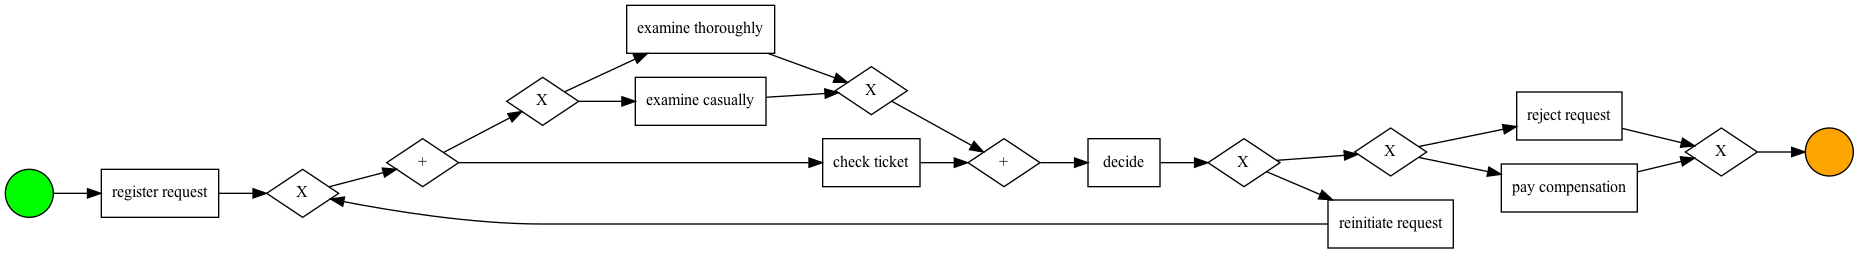

In [9]:
 pm4py.view_bpmn(process_mode)